hugo.deplagne  
pierre.litoux  
SCIA 2024

### la question que l'on se pose est la suivante :

### Comment est répartis le poids des acteurs sur la blockchain

Notre analyse va proter sur l'année de 2015 afin d'avoir une vision sur une période précise et délimitée.

notre objectif est de diviser les acteurs en différents groupes en fonction de leurs bénéfices sur cette période. Puis de comparer l'influence de ses groupes sur la blockchain :
On tient a rappeler que les jeux de donnée ne comportent que les 100 plus gros acteurs sur cette période. On s'attend a deux scénarios :
1 - les acteurs sont a peut pret équivalent sur le marché et les acteurs faisant le plus de bénéfices ne sont que légemrent plus impactant par rapport au reste
2 - Une poignée d'acteurs ont un quasi monopole ou impact bien plus fort que le reste des acteurs

In [441]:
import pandas as pd
from os import path
import os
from datetime import datetime
import matplotlib.pyplot as plt
import glob
import numpy as np
import plotly.express as px

Premièrement on récupère les différents jeux de données et on nettoie les données

In [442]:
# extraction of all the csv files in the folder into dataframes
ext_path = './timeseries/external.csv'
external_df = pd.read_csv(ext_path, sep=',', header=0, index_col=1, parse_dates=True)
external_df.drop(['Unnamed: 0'], axis=1, inplace=True)

glob_path = './timeseries/global.csv'
transactions_df = pd.read_csv(glob_path, sep=',', header=0, index_col=0, parse_dates=True)
# drop the original "year", "month", and "day" columns
transactions_df.drop(columns=['year', 'month', 'day'], inplace=True)

actor_df = pd.read_csv('timeseries/blockchain_by_actor.csv', index_col=0)
# Remove lines where year = 0
actor_df = actor_df[actor_df['year'] != 0]
# combine "year", "month", and "day" columns into a single datetime column
actor_df['date'] = pd.to_datetime(actor_df[['year', 'month', 'day']])
# drop the original "year", "month", and "day" columns
actor_df.drop(columns=['year', 'month', 'day'], inplace=True)
# Change the nb_received and nb_transactions and nb_spent and sum_fee columns to integers
actor_df = actor_df.astype({'nb_received': 'int64', 'nb_transactions': 'int64', 'nb_spent': 'int64', 'sum_fee': 'int64'})
# set the index to the identity of the actor
#actor_profits_df.set_index('identity', inplace=True)
#actor_profits_df = actor_profits_df.groupby([actor_profits_df.index, 'date']).sum()


"""
fileNames = glob.glob('networks/*')
#print(fileNames)
file_dict = {
    datetime.strptime(path.basename(file).split('.')[0], '%Y-%m-%d'): pd.read_csv(file)
    for file in fileNames
}

network_df = pd.concat(file_dict).sort_index()"""
print('loading data done')


loading data done


Pour notre étude on va s'intérésser seulement a l'année 2015

In [443]:
# only keep data of 2015

external_df = external_df[external_df.index.year == 2015]
external_df.head()

,PriceUSD,HashRate
date,,
2015-01-02,315.942732,333345.017260
2015-01-03,285.647310,327284.198765
2015-01-04,263.334575,347486.927083
2015-01-05,275.003852,315162.561773
2015-01-06,287.549521,319203.107437


In [444]:
transactions_df = transactions_df[transactions_df.index.year == 2015]
transactions_df.head()

,total_fee,total_received_satoshi,total_sent_satoshi,mean_fee_satoshi,mean_feeUSD,mean_fee_for100,nb_transactions,nb_payments,mean_nb_inputs,mean_nb_outputs,nb_mining,total_mining_satoshi,newly_created_coins,self_spent_satoshi,total_received,volume_without_self
2015-01-01,801373971,45473028339385,45058028339385,13609.829337,4.284054e+06,0.799999,58882,161194,2.595241,2.737577,166,415801373971,415000000000,2757774885900,45473028339385,42715253453485
2015-01-02,1159934218,73370568521080,72955568521080,14978.682808,4.732406e+06,0.778933,77439,257633,2.715557,3.326915,166,416159934218,415000000000,4316724676318,73370568521080,69053843844762
2015-01-03,1196476043,82635189454578,82220189454578,14304.385766,4.086009e+06,0.797419,83644,295618,2.781885,3.534240,166,416196476043,415000000000,5584584356557,82635189454578,77050605098021
2015-01-04,2159195328,115159442449532,114726942449532,25138.199015,6.619757e+06,0.899054,85893,280288,2.770133,3.263223,173,434659195328,432500000000,6554587956125,115159442449532,108604854493407
2015-01-05,1608443040,112439228285641,112051728285641,16955.609622,4.662858e+06,0.898594,94862,286552,2.954471,3.020725,155,389108443040,387500000000,5063695492444,112439228285641,107375532793197


In [445]:
actor_df = actor_df[actor_df['date'].dt.year == 2015]
actor_df.head()

,identity,received,nb_received,date,sum_fee,mean_fee_for100,nb_transactions,sent,self_spent,self_spent_estimated,nb_spent,spent
0,HappyCoins.com,1.377590e+09,4,2015-01-01,49596,0.004957,4,1.277500e+09,0.0,0.0,8,1.277500e+09
1,821,2.476057e+09,5,2015-01-01,10000,0.000851,1,1.174552e+09,0.0,0.0,2,1.174552e+09
2,FortuneJack.com,1.201470e+08,29,2015-01-01,83000,0.194670,11,1.541127e+08,14158970.0,14158970.0,22,1.399538e+08
3,396,1.906135e+10,70,2015-01-01,540000,0.023738,54,1.842989e+10,0.0,0.0,108,1.842989e+10
4,SatoshiMines.com,7.401319e+08,193,2015-01-01,740000,0.447934,45,1.813624e+09,35044568.0,35044568.0,84,1.778579e+09


In [446]:
#network_df = network_df[network_df.index == 2015]
#network_df.head()

On veut récupérer les acteurs ayant fait le plus de profit en dolar sur toute la période proposée, pour cela on calcul le bénéfice journalier effectué grace a cette formule

received - (spent - self_spent) - sum_fee

In [447]:
actor_df.set_index('identity', inplace=True)
actor_df = actor_df.groupby([actor_df.index, 'date']).sum()

# add a new column to the actor_df dataframe that contains the balance of the actor calculated as : received - (spent - self_spent) - sum_fee
actor_df['balance'] = actor_df['received'] - (actor_df['spent'] - actor_df['self_spent']) - actor_df['sum_fee']
actor_df.head()

received  nb_received   sum_fee  mean_fee_for100  \
identity date                                                               
0        2015-01-01  3.021860e+10         4265  12350755         1.926137   
         2015-01-02  3.401216e+10         8395  15588104         1.882565   
         2015-01-03  2.546280e+11        10004  14742886         1.984796   
         2015-01-04  2.431648e+11         9007  18683447         2.075441   
         2015-01-05  4.882942e+10         6553  15866463         1.883876   

                     nb_transactions          sent  self_spent  \
identity date                                                    
0        2015-01-01              783  3.001272e+10         0.0   
         2015-01-02              962  3.400937e+10         0.0   
         2015-01-03              943  2.517348e+11         0.0   
         2015-01-04             1059  2.429788e+11         0.0   
         2015-01-05              995  4.926332e+10         0.0   

                     self_spent_estimated  nb_spent         spent  \
identity date                                                       
0        2015-01-01          0.000000e+00      1696  3.001272e+10   
         2015-01-02          0.000000e+00      2068  3.400937e+10   
         2015-01-03          2.011365e+11      2039  5.059830e+10   
         2015-01-04          2.004149e+11      2293  4.256388e+10   
         2015-01-05          0.000000e+00      2098  4.926332e+10   

                          balance  
identity date                      
0        2015-01-01  1.935257e+08  
         2015-01-02 -1.280615e+07  
         2015-01-03  2.040150e+11  
         2015-01-04  2.005823e+11  
         2015-01-05 -4.497694e+08

on récupére le profit, le profit correspond a la somme des benefices journaliers du debut au jour voulu, le profit total est donc le profit du dernier jour

In [448]:
# compute the profits wich is the cumsum of each actor balance
actor_df['profit'] = actor_df.groupby(level=0)['balance'].cumsum()

actor_df.loc['ePay.info_CoinJoinMess'].head()

,received,nb_received,sum_fee,mean_fee_for100,nb_transactions,sent,self_spent,self_spent_estimated,nb_spent,spent,balance,profit
date,,,,,,,,,,,,
2015-01-01,5.482961e+11,12818,38239914,0.524910,1148,2.470622e+12,1.794224e+12,1.898125e+12,20749,5.724979e+11,1.769984e+12,1.769984e+12
2015-01-02,1.259197e+12,19625,62774624,0.433979,2145,4.627579e+12,3.294133e+12,3.310133e+12,41870,1.317446e+12,3.235821e+12,5.005805e+12
2015-01-03,1.505475e+12,17609,65207667,0.702425,1696,4.967562e+12,3.536510e+12,3.536510e+12,24355,1.431051e+12,3.610868e+12,8.616673e+12
2015-01-04,1.764592e+12,16536,61792309,0.583889,1487,4.893706e+12,3.061963e+12,3.061963e+12,23306,1.831743e+12,2.994749e+12,1.161142e+13
2015-01-05,1.374703e+12,29140,93421193,0.330920,2440,4.604852e+12,3.214107e+12,3.214107e+12,41958,1.390745e+12,3.197972e+12,1.480939e+13


On compare ci dessous le bénéfice de quelques acteurs

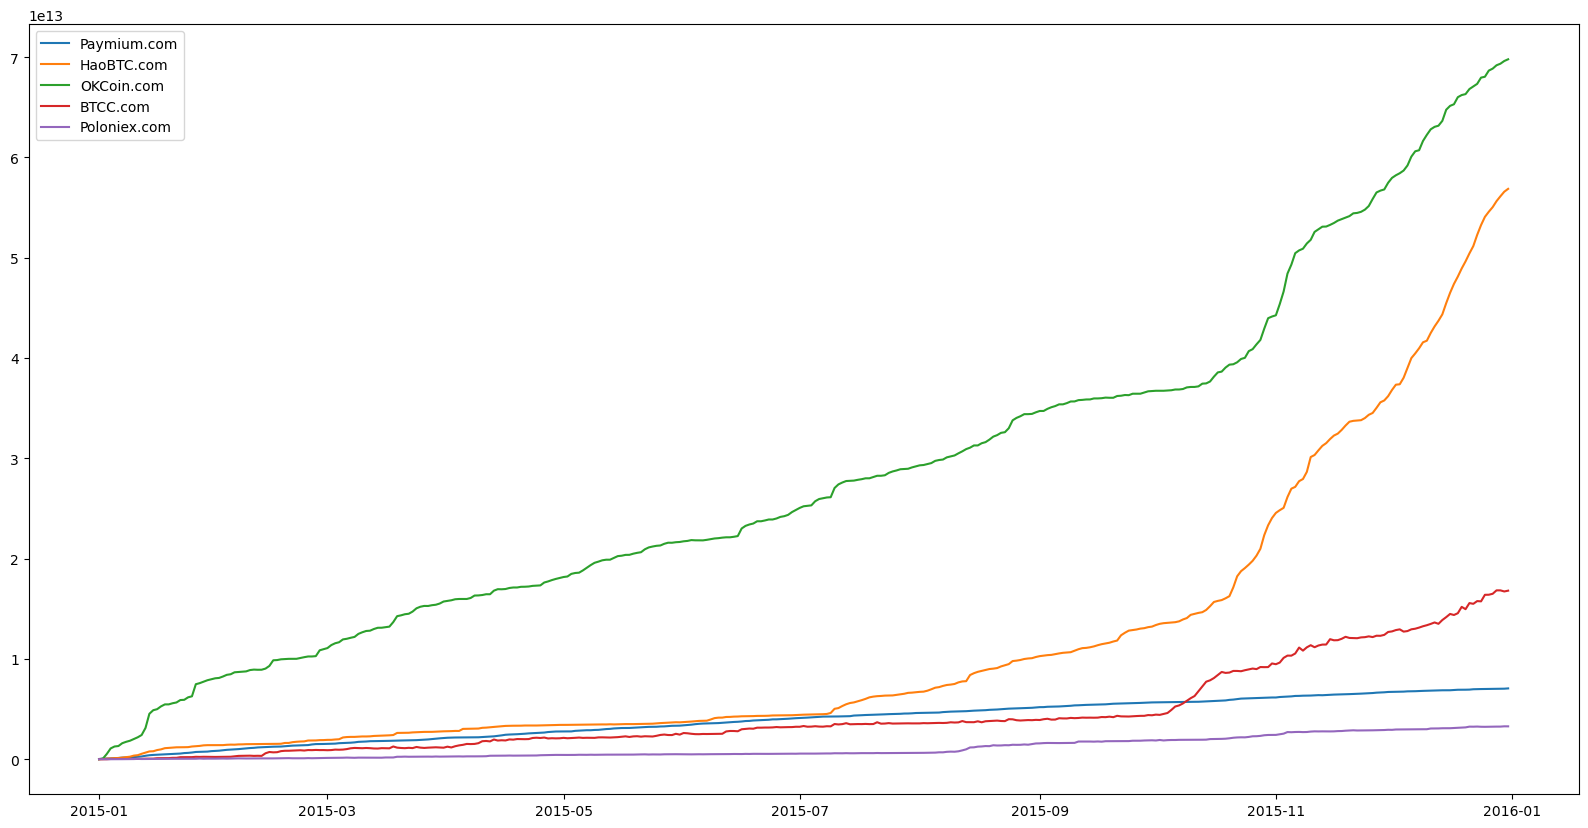

In [449]:
plt.figure(figsize=(20,10))
look = ['profit']
plt.plot(actor_df.loc['Paymium.com'].index, actor_df.loc['Paymium.com'][look], label='Paymium.com')
plt.plot(actor_df.loc['HaoBTC.com'].index, actor_df.loc['HaoBTC.com'][look], label='HaoBTC.com')
plt.plot(actor_df.loc['OKCoin.com'].index, actor_df.loc['OKCoin.com'][look], label='OKCoin.com')
plt.plot(actor_df.loc['BTCC.com'].index, actor_df.loc['BTCC.com'][look], label='BTCC.com')
plt.plot(actor_df.loc['Poloniex.com'].index, actor_df.loc['Poloniex.com'][look], label='Poloniex.com')
plt.legend()
plt.show()

on veut passer le profit en USDollar pour avoir une meilleur idée de l'ordre de grandeur

In [450]:
# using the profit column and the external_df dataframe, we can compute the profit of the exchanges in USD
# we need to convert the profit in BTC to USD

# first we need to create a small dataframes with only the date, the actor and the profit
actor_profits_df = actor_df[['profit']]

# we need to compute the profit in USD using the external_df dataframe
# we need to merge the two dataframes on the date column
actor_profits_df = actor_profits_df.merge(external_df[['PriceUSD']], left_index=True, right_index=True)
actor_profits_df.head()


profit    PriceUSD
identity date                                
0        2015-01-02  1.807196e+08  315.942732
         2015-01-03  2.041957e+11  285.647310
         2015-01-04  4.047780e+11  263.334575
         2015-01-05  4.043282e+11  275.003852
         2015-01-06  7.076734e+11  287.549521

In [451]:
# we can now compute the profit in USD
actor_profits_df['profit_usd'] = actor_profits_df['profit'] / 1e9 * actor_profits_df['PriceUSD']
actor_profits_df.head()

profit    PriceUSD     profit_usd
identity date                                               
0        2015-01-02  1.807196e+08  315.942732      57.097035
         2015-01-03  2.041957e+11  285.647310   58327.956877
         2015-01-04  4.047780e+11  263.334575  106592.036495
         2015-01-05  4.043282e+11  275.003852  111191.814421
         2015-01-06  7.076734e+11  287.549521  203491.134947

In [452]:
# get these in a list
top_actors = actor_profits_df.groupby(level=0)['profit_usd'].max().sort_values(ascending=False).head().index.tolist()

# show the top 5 actor with the highest profit
actor_profits_df.groupby(level=0)['profit_usd'].max().sort_values(ascending=False).head()




identity
ePay.info_CoinJoinMess    1.185568e+09
Huobi.com                 3.248009e+08
Bitstamp.net              2.584437e+08
Xapo.com                  1.181836e+08
BTC-e.com                 5.774306e+07
Name: profit_usd, dtype: float64

Ici on compare les bénéfices des 5 plus gros acteurs parmis les 100.
On observe deja que l'acteur ePay.info_CoinJoinMess surplombe largement les 4 autres acteurs qui le suive

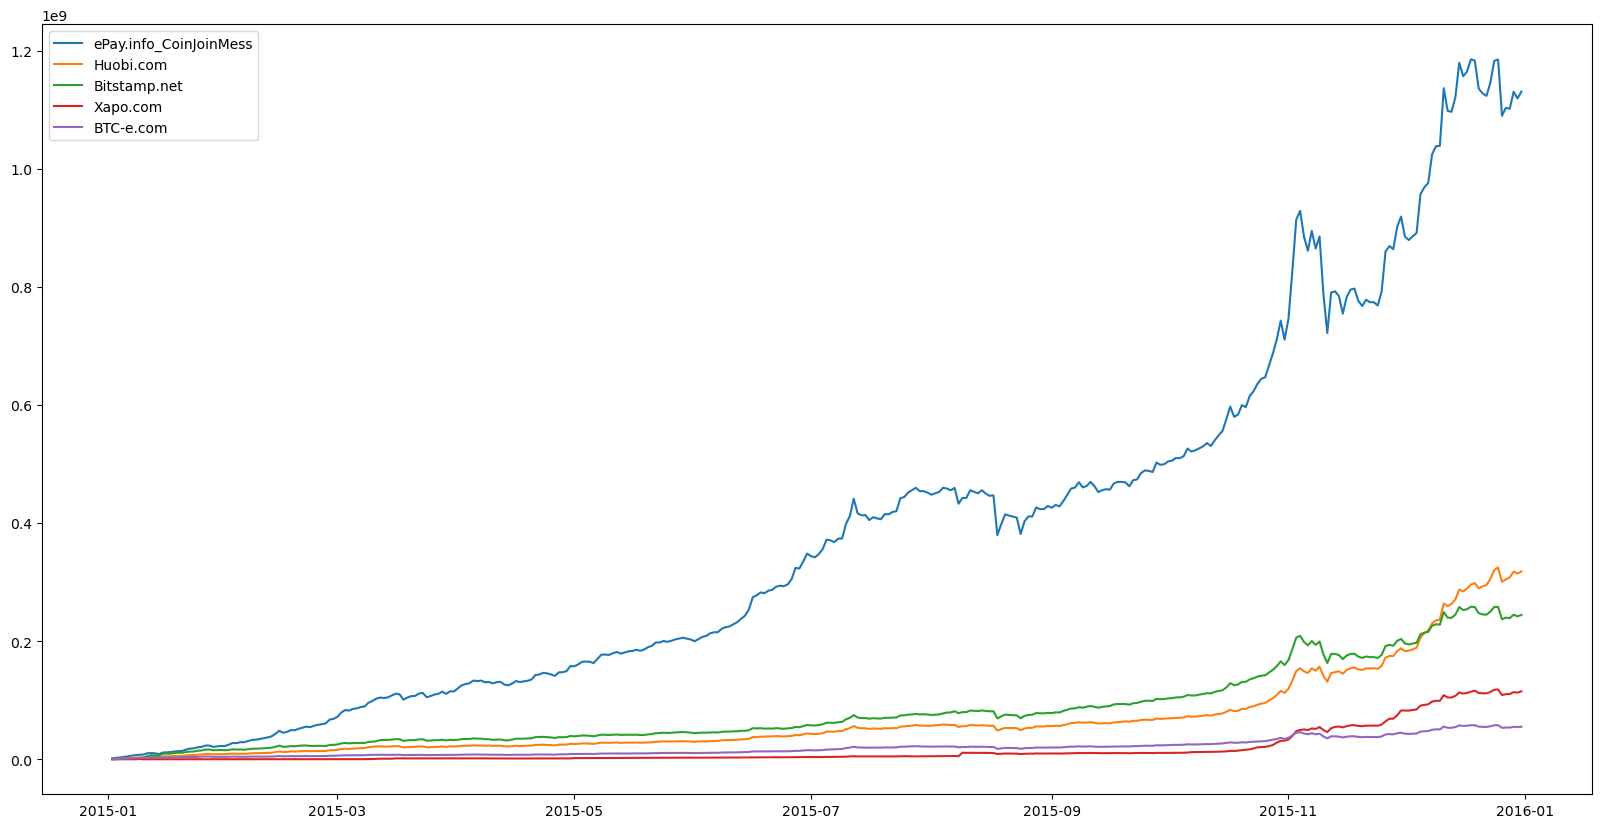

In [453]:
plt.figure(figsize=(20,10))
look = ['profit_usd']
for elt in top_actors:
    plt.plot(actor_profits_df.loc[elt].index, actor_profits_df.loc[elt][look], label=elt)

plt.legend()
plt.show()


On groupe les acteurs par quartile pour voir leur impact par groupe.
on veut essayer de voir si les acteurs les plus gros échangent bien plus, ou alors si les echanges par quartiles restent proche de 25 % par quartiles


In [454]:
# make a df of all the actors and their final profit and profit_usd
final_profits_df = actor_profits_df.groupby(level=0)[['profit', 'profit_usd']].max().sort_values(by='profit_usd', ascending=False)
final_profits_df.head(7)

,profit,profit_usd
identity,,
ePay.info_CoinJoinMess,2.631645e+15,1.185568e+09
Huobi.com,7.404631e+14,3.248009e+08
Bitstamp.net,5.688628e+14,2.584437e+08
Xapo.com,2.679516e+14,1.181836e+08
BTC-e.com,1.281194e+14,5.774306e+07
107,8.720245e+13,3.819085e+07
OKCoin.com,6.978597e+13,3.100916e+07


In [455]:
# divide the actors into quartiles based on their profit
final_profits_df['quartile'] = pd.qcut(final_profits_df['profit'], 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
final_profits_df

,profit,profit_usd,quartile
identity,,,
ePay.info_CoinJoinMess,2.631645e+15,1.185568e+09,Q4
Huobi.com,7.404631e+14,3.248009e+08,Q4
Bitstamp.net,5.688628e+14,2.584437e+08,Q4
Xapo.com,2.679516e+14,1.181836e+08,Q4
BTC-e.com,1.281194e+14,5.774306e+07,Q4
...,...,...,...
72472408,8.172299e+08,1.992902e+02,Q1
16768780,6.077411e+08,1.614744e+02,Q1
419,1.036196e+08,4.712120e+01,Q1


In [456]:
# print the total profit of each quartile
final_profits_df.groupby('quartile')['profit'].sum()

quartile
Q1    4.081625e+10
Q2    6.302959e+11
Q3    7.697537e+12
Q4    4.690425e+15
Name: profit, dtype: float64

In [457]:
# get the list of actors in each quartile
quartile_1 = final_profits_df[final_profits_df['quartile'] == 'Q1'].index.tolist()
quartile_2 = final_profits_df[final_profits_df['quartile'] == 'Q2'].index.tolist()
quartile_3 = final_profits_df[final_profits_df['quartile'] == 'Q3'].index.tolist()
quartile_4 = final_profits_df[final_profits_df['quartile'] == 'Q4'].index.tolist()

# get the number of transactions of each quartile
quartile_1_transactions = actor_df.loc[quartile_1]['nb_transactions'].sum()
quartile_2_transactions = actor_df.loc[quartile_2]['nb_transactions'].sum()
quartile_3_transactions = actor_df.loc[quartile_3]['nb_transactions'].sum()
quartile_4_transactions = actor_df.loc[quartile_4]['nb_transactions'].sum()

# print the number of transactions of each quartile 
print('Q1 transactions : ', quartile_1_transactions)
print('Q2 transactions : ', quartile_2_transactions)
print('Q3 transactions : ', quartile_3_transactions)
print('Q4 transactions : ', quartile_4_transactions)
print('Total transactions : ', actor_df['nb_transactions'].sum())

# print the number of transactions of each quartile in percentage
print('Q1 transactions : ', quartile_1_transactions / actor_df['nb_transactions'].sum() * 100)
print('Q2 transactions : ', quartile_2_transactions / actor_df['nb_transactions'].sum() * 100)
print('Q3 transactions : ', quartile_3_transactions / actor_df['nb_transactions'].sum() * 100)
print('Q4 transactions : ', quartile_4_transactions / actor_df['nb_transactions'].sum() * 100)
print('Total transactions : ',(quartile_1_transactions + quartile_2_transactions + quartile_3_transactions + quartile_4_transactions) / actor_df['nb_transactions'].sum())

# print the number of transactions of the top 5 actors
top_5_transactions = actor_df.loc[top_actors]['nb_transactions'].sum()
print('Top 5 transactions : ', top_5_transactions)
print('Top 5 transactions : ', top_5_transactions / actor_df['nb_transactions'].sum() * 100)

#print the number of actors
print('Number of actors : ', len(final_profits_df.index.get_level_values(0).unique()))


Q1 transactions :  150377
Q2 transactions :  394229
Q3 transactions :  575885
Q4 transactions :  5056946
Total transactions :  6177437
Q1 transactions :  2.434294352172268
Q2 transactions :  6.381756705895988
Q3 transactions :  9.322393737078986
Q4 transactions :  81.86155520485275
Total transactions :  1.0
Top 5 transactions :  2602244
Top 5 transactions :  42.124978368860745
Number of actors :  100


numériquement, on se rend deja compte que le quartiles 4, correspondant au 25 acteurs ayant fait le plus de profit, monoplyse a lui tout seul environ 82 % des transactions faite par les 100 plus gros acteurs.

Il est d'autant plus flagrant de voir que les 5 plus gros acteurs font a eux tout seuls plus de 42 % de toutes les transactions des 100 plus gros acteurs.


In [458]:
# look at the mean_fee_for100 for each actor and update the final_profits_df dataframe
final_profits_df['mean_fee_for100'] = actor_df.groupby(level=0)['mean_fee_for100'].mean()

# add every actor_df column to the final_profits_df dataframe
l = ["received", "nb_received", "sum_fee", "mean_fee_for100", "nb_transactions", "sent", "self_spent", "self_spent_estimated", "nb_spent", "spent"]
l = ["mean_fee_for100", "nb_transactions"]
for elt in l:
    final_profits_df[elt] = actor_df.groupby(level=0)[elt].sum()


final_profits_df.head()



,profit,profit_usd,quartile,mean_fee_for100,nb_transactions
identity,,,,,
ePay.info_CoinJoinMess,2.631645e+15,1.185568e+09,Q4,996.025937,1784401
Huobi.com,7.404631e+14,3.248009e+08,Q4,3.250980,462394
Bitstamp.net,5.688628e+14,2.584437e+08,Q4,89.150888,53525
Xapo.com,2.679516e+14,1.181836e+08,Q4,30.757921,269466
BTC-e.com,1.281194e+14,5.774306e+07,Q4,11.948425,32458


Ci-dessous on affiche un camembert qui représente l'impact sur le réseaux de chaque quartile.

la taille que prend une section correspond au nombre de transaction totale effectuée par l'acteur.
Ceux-ci sont séparés par couleur en fonction de leur profit

In [459]:
# add identity to the final_profits_df dataframe
final_profits_df['identity'] = final_profits_df.index.get_level_values(0).unique()

# add a log scale column of the profit
final_profits_df['log_profit'] = np.log(np.abs(final_profits_df['profit_usd']))

fig = px.sunburst(final_profits_df, path=['quartile', 'identity'], values='nb_transactions', color='log_profit', color_continuous_scale='RdBu', hover_data={'profit_usd':':.2e'})

fig.show()




In [460]:
fig = px.treemap(final_profits_df, path=[px.Constant('actors'), 'quartile', 'identity'], values='nb_transactions', color='log_profit', color_continuous_scale='RdBu', hover_data={'profit_usd':':.2e'})
fig.show()

On peut avec cette figure observer que sur l'année 2015 une poignée d'acteurs ont totalement dominés le marché. ... TODO

maintenant qu'on a identifié les plus gros acteurs et leur part dans le nombre de transactions :
-> comparer leurs stratégie avec les plus mauvais en période de crise

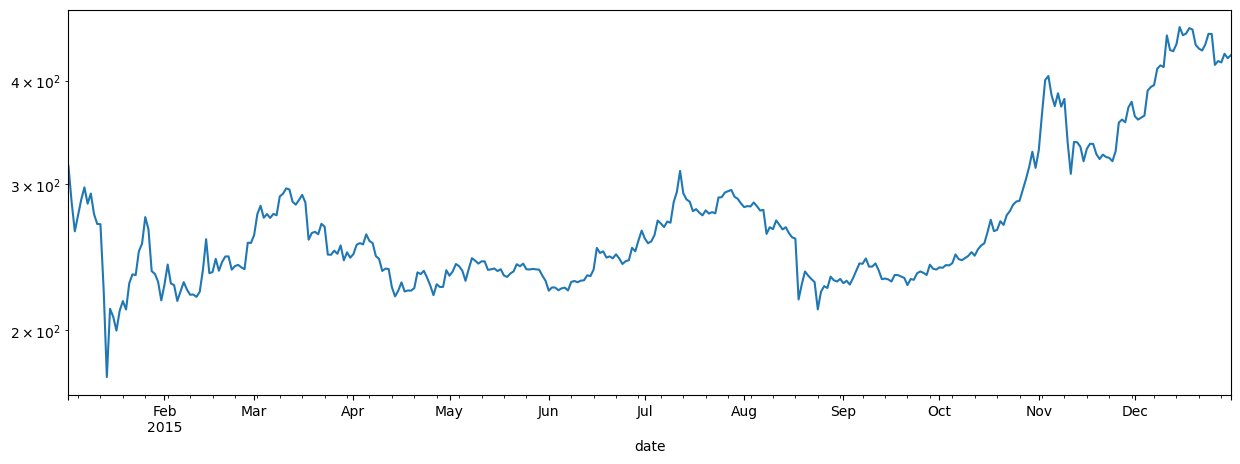

In [461]:
external_df['PriceUSD'].plot(figsize=(15, 5), logy=True)

plt.show()

zoom sur une pếriode de crise : ici on identifie une forte baisse de la valeur du bitcoin de mars 2015

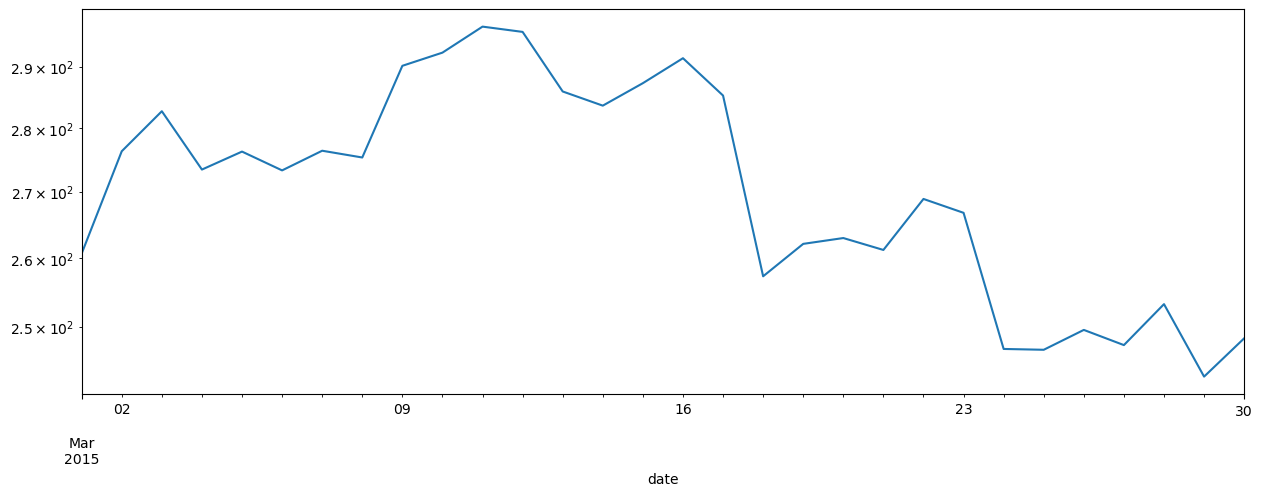

In [462]:
# look at the date range from 2015-01-01 to 2015-01-31
date_range = ['2015-03-01', '2015-03-30']
external_df['PriceUSD'].loc[date_range[0]:date_range[1]].plot(figsize=(15, 5), logy=True)

plt.show()

In [463]:
actor_df

received  nb_received   sum_fee  \
identity               date                                              
0                      2015-01-01  3.021860e+10         4265  12350755   
                       2015-01-02  3.401216e+10         8395  15588104   
                       2015-01-03  2.546280e+11        10004  14742886   
                       2015-01-04  2.431648e+11         9007  18683447   
                       2015-01-05  4.882942e+10         6553  15866463   
...                                         ...          ...       ...   
ePay.info_CoinJoinMess 2015-12-27  1.690398e+12        18511  63461398   
                       2015-12-28  1.407098e+12        22024  67999869   
                       2015-12-29  1.559442e+12        25523  87102894   
                       2015-12-30  1.648537e+12        25034  80942854   
                       2015-12-31  1.422771e+12        18199  56220386   

                                   mean_fee_for100  nb_transactions  \
identity               date                                           
0                      2015-01-01         1.926137              783   
                       2015-01-02         1.882565              962   
                       2015-01-03         1.984796              943   
                       2015-01-04         2.075441             1059   
                       2015-01-05         1.883876              995   
...                                            ...              ...   
ePay.info_CoinJoinMess 2015-12-27         0.394467             1724   
                       2015-12-28         0.180793             2041   
                       2015-12-29         0.179579             2485   
                       2015-12-30         0.287333             2416   
                       2015-12-31         0.233125             1655   

                                           sent    self_spent  \
identity               date                                     
0                      2015-01-01  3.001272e+10  0.000000e+00   
                       2015-01-02  3.400937e+10  0.000000e+00   
                       2015-01-03  2.517348e+11  0.000000e+00   
                       2015-01-04  2.429788e+11  0.000000e+00   
                       2015-01-05  4.926332e+10  0.000000e+00   
...                                         ...           ...   
ePay.info_CoinJoinMess 2015-12-27  5.156913e+12  3.899206e+12   
                       2015-12-28  7.473888e+12  6.107860e+12   
                       2015-12-29  6.013149e+12  4.582233e+12   
                       2015-12-30  7.599028e+12  5.994416e+12   
                       2015-12-31  5.839810e+12  4.372339e+12   

                                   self_spent_estimated  nb_spent  \
identity               date                                         
0                      2015-01-01          0.000000e+00      1696   
                       2015-01-02          0.000000e+00      2068   
                       2015-01-03          2.011365e+11      2039   
                       2015-01-04          2.004149e+11      2293   
                       2015-01-05          0.000000e+00      2098   
...                                                 ...       ...   
ePay.info_CoinJoinMess 2015-12-27          3.899206e+12     23035   
                       2015-12-28          6.107860e+12     28131   
                       2015-12-29          4.582233e+12     31928   
                       2015-12-30          5.994416e+12     29270   
                       2015-12-31          4.372339e+12     23928   

                                          spent       balance        profit  
identity               date                                                  
0                      2015-01-01  3.001272e+10  1.935257e+08  1.935257e+08  
                       2015-01-02  3.400937e+10 -1.280615e+07  1.807196e+08  
                       2015-01-03  5.059830e+10  2.040150e+11  2.041957e+11  
                  

on veut regarder le nombre de transaction, les sommes dépensées et recue sur cette période

In [464]:
# set the date as a column
actor_df.reset_index(inplace=True)

# set the date as the index
actor_df.set_index('date', inplace=True)

# only keep the date range
actor_df_2015_08 = actor_df.loc[date_range[0]:date_range[1]]

actor_df_2015_08.reset_index(inplace=True)
actor_df_2015_08.set_index('identity', inplace=True)
actor_df_2015_08 = actor_df_2015_08.groupby([actor_df_2015_08.index, 'date']).sum()

# remove the year from the date
#actor_df_2015_08.index = actor_df_2015_08.index.set_levels(actor_df_2015_08.index.levels[1].strftime('%m-%d'), level=1)

actor_df_2015_08

received  nb_received    sum_fee  \
identity               date                                               
0                      2015-03-01  3.321185e+10        11184   17844749   
                       2015-03-02  1.154547e+11         7679   18657745   
                       2015-03-03  1.310782e+11         6806   17034451   
                       2015-03-04  5.952002e+10         7052   20457274   
                       2015-03-05  5.476024e+10         6324   39047165   
...                                         ...          ...        ...   
ePay.info_CoinJoinMess 2015-03-26  2.016888e+12        24157   82695684   
                       2015-03-27  3.186136e+12        26500  104103640   
                       2015-03-28  1.361891e+12        19787   69136106   
                       2015-03-29  1.202184e+12        20044   76740596   
                       2015-03-30  2.880475e+12        31838  109421992   

                                   mean_fee_for100  nb_transactions  \
identity               date                                           
0                      2015-03-01         2.311582             1070   
                       2015-03-02         2.568801             1153   
                       2015-03-03         2.504085             1092   
                       2015-03-04         2.385513             1185   
                       2015-03-05         1.998396             1469   
...                                            ...              ...   
ePay.info_CoinJoinMess 2015-03-26         0.280102             2910   
                       2015-03-27         0.267345             3057   
                       2015-03-28         0.518450             2686   
                       2015-03-29         0.442064             3579   
                       2015-03-30         0.297456             4575   

                                           sent    self_spent  \
identity               date                                     
0                      2015-03-01  3.307544e+10  0.000000e+00   
                       2015-03-02  1.164067e+11  0.000000e+00   
                       2015-03-03  1.253659e+11  0.000000e+00   
                       2015-03-04  5.199809e+10  0.000000e+00   
                       2015-03-05  5.652272e+10  0.000000e+00   
...                                         ...           ...   
ePay.info_CoinJoinMess 2015-03-26  7.139063e+12  5.075589e+12   
                       2015-03-27  1.188394e+13  8.631676e+12   
                       2015-03-28  5.731955e+12  4.375993e+12   
                       2015-03-29  5.223582e+12  4.078984e+12   
                       2015-03-30  1.011998e+13  7.276122e+12   

                                   self_spent_estimated  nb_spent  \
identity               date                                         
0                      2015-03-01          0.000000e+00      2317   
                       2015-03-02          6.999999e+10      2499   
                       2015-03-03          4.000000e+10      2294   
                       2015-03-04          0.000000e+00      2529   
                       2015-03-05          0.000000e+00      3345   
...                                                 ...       ...   
ePay.info_CoinJoinMess 2015-03-26          5.075589e+12     35420   
                       2015-03-27          8.631676e+12     34626   
                       2015-03-28          4.375993e+12     29271   
                       2015-03-29          4.078984e+12     58852   
                       2015-03-30          7.276122e+12     42335   

                                          spent       balance        profit  
identity               date                                                  
0                      2015-03-01  3.307544e+10  1.185623e+08  1.129250e+13  
                       2015-03-02  4.640670e+10  6.902934e+10  1.136153e+13  
                       2015-03-03  8.536593e+10  4.569521e+10  1.140722e+13  
     

In [465]:
# group the actor_df_2015_08 dataframe by quartile
for elt in final_profits_df['quartile'].unique():
    print(elt)
    #print(actor_df_2015_08.loc[final_profits_df[final_profits_df['quartile'] == elt].index.tolist()]['nb_transactions'])
    # update the actor_df_2015_08 dataframe
    actor_df_2015_08['quartile'] = actor_df_2015_08.index.get_level_values(0).map(final_profits_df.set_index('identity')['quartile'])

# set the quartile as the index
actor_df_2015_08.reset_index(inplace=True)
actor_df_2015_08.set_index('quartile', inplace=True)

#group the actor_df_2015_08 dataframe by quartile
actor_df_2015_08 = actor_df_2015_08.groupby([actor_df_2015_08.index, 'date']).sum()


actor_df_2015_08


Q4
Q3
Q2
Q1


/tmp/ipykernel_5362/2584143639.py:13: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



received  nb_received    sum_fee  mean_fee_for100  \
quartile date                                                                
Q1       2015-03-01  1.386668e+10          558    2085581        31.593050   
         2015-03-02  1.968976e+10          532    3217901        23.014985   
         2015-03-03  3.178442e+10          531    2878195        27.567520   
         2015-03-04  3.696868e+10          605    2971694        21.540870   
         2015-03-05  4.361609e+10          455    2356050        27.225799   
...                           ...          ...        ...              ...   
Q4       2015-03-26  5.813361e+12        58890  216718033         9.331877   
         2015-03-27  6.688714e+12        53937  201433639        10.569116   
         2015-03-28  3.868697e+12        47109  146299854        10.321718   
         2015-03-29  3.836433e+12        57198  172181920        16.294093   
         2015-03-30  6.619057e+12        58563  197544788        18.216831   

                     nb_transactions          sent    self_spent  \
quartile date                                                      
Q1       2015-03-01              134  1.383863e+10  0.000000e+00   
         2015-03-02              228  2.163733e+10  0.000000e+00   
         2015-03-03              240  3.028789e+10  0.000000e+00   
         2015-03-04              252  3.191167e+10  0.000000e+00   
         2015-03-05              189  4.711389e+10  0.000000e+00   
...                              ...           ...           ...   
Q4       2015-03-26            14329  1.225466e+13  6.385432e+12   
         2015-03-27            10722  1.706940e+13  1.003648e+13   
         2015-03-28             8901  9.206507e+12  5.175020e+12   
         2015-03-29            11545  8.624450e+12  5.042183e+12   
         2015-03-30            10895  1.566348e+13  8.881541e+12   

                     self_spent_estimated  nb_spent         spent  \
quartile date                                                       
Q1       2015-03-01          0.000000e+00       267  1.383863e+10   
         2015-03-02          0.000000e+00       467  2.163733e+10   
         2015-03-03          0.000000e+00       498  3.028789e+10   
         2015-03-04          0.000000e+00       546  3.191167e+10   
         2015-03-05          0.000000e+00       387  4.711389e+10   
...                                   ...       ...           ...   
Q4       2015-03-26          7.590040e+12     61397  4.664616e+12   
         2015-03-27          1.095358e+13     52803  6.115819e+12   
         2015-03-28          6.231280e+12     44212  2.975227e+12   
         2015-03-29          5.528417e+12     77243  3.096033e+12   
         2015-03-30          1.012145e+13     58164  5.542026e+12   

                          balance        profit  
quartile date                                    
Q1       2015-03-01  2.596008e+07 -5.440058e+08  
         2015-03-02 -1.950788e+09 -2.641600e+09  
         2015-03-03  1.493651e+09 -1.172894e+09  
         2015-03-04  5.054039e+09  3.908492e+09  
         2015-03-05 -3.500156e+09  3.809878e+08  
...                           ...           ...  
Q4       2015-03-26  7.533960e+12  7.365596e+14  
         2015-03-27  1.060918e+13  7.471688e+14  
         2015-03-28  6.068344e+12  7.532371e+14  
         2015-03-29  5.782411e+12  7.590195e+14  
         2015-03-30  9.958374e+12  7.689779e+14  

[120 rows x 12 columns]

/tmp/ipykernel_5362/1102895590.py:29: UserWarning:

FixedFormatter should only be used together with FixedLocator



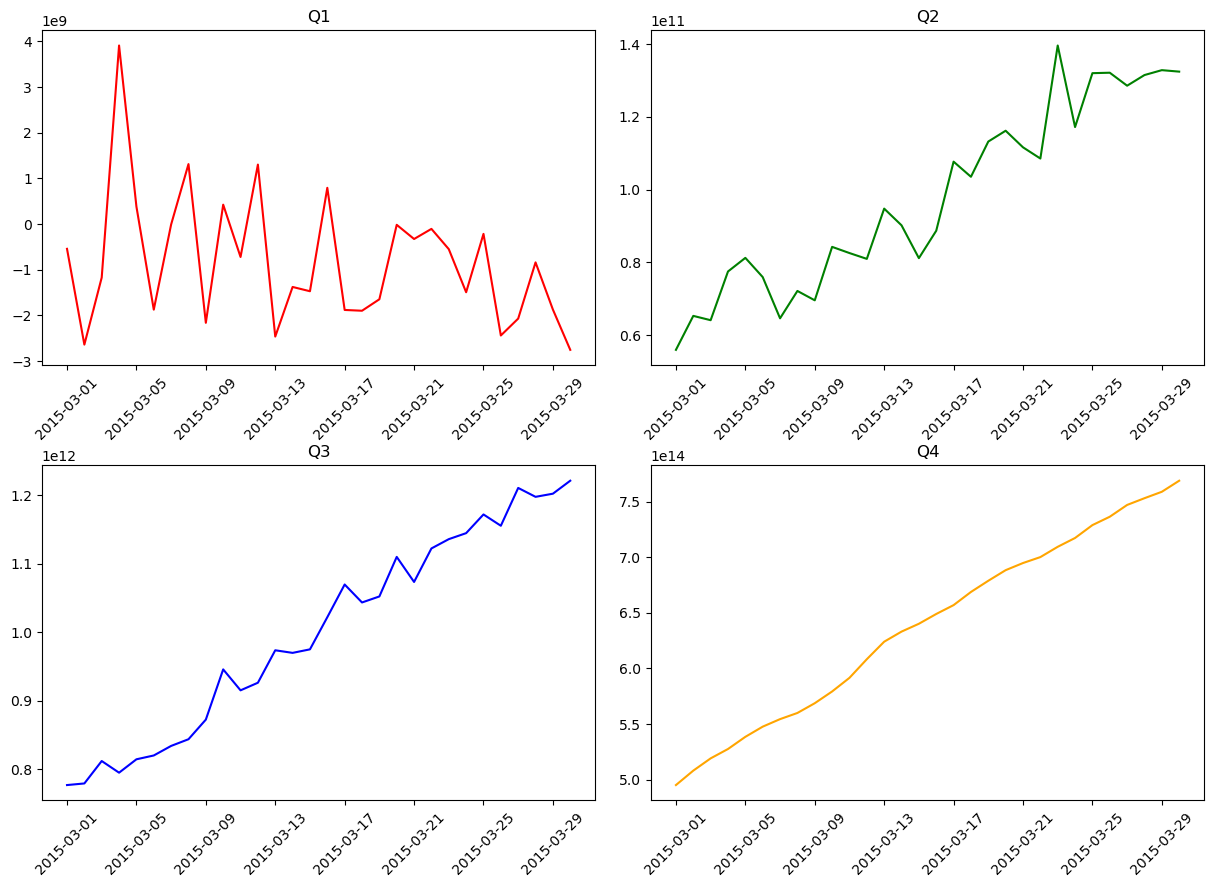

In [466]:
# plot the number of transactions of each quartile
look = 'profit'
# square 2*2
fig, ax = plt.subplots(2, 2, figsize=(15, 10))


#plt.plot(actor_df_2015_08.loc['Q1'][look], label='Q1')
# 1 plot per quartile

# Q1
ax[0, 0].plot(actor_df_2015_08.loc['Q1'][look], label='Q1', color='red', )

# Q2
ax[0, 1].plot(actor_df_2015_08.loc['Q2'][look], label='Q2', color='green')

# Q3
ax[1, 0].plot(actor_df_2015_08.loc['Q3'][look], label='Q3', color='blue')

# Q4
ax[1, 1].plot(actor_df_2015_08.loc['Q4'][look], label='Q4', color='orange')

# set the title
ax[0, 0].set_title('Q1')
ax[0, 1].set_title('Q2')
ax[1, 0].set_title('Q3')
ax[1, 1].set_title('Q4')

for elt in ax.flat:
    elt.set_xticklabels(elt.get_xticklabels(), rotation=45)
plt.subplots_adjust(wspace=0.1, hspace=0.3)

# show the plot
plt.show()
